1.3 - Number of Parameters

In [ ]:
hidden_layers = (200, 100)

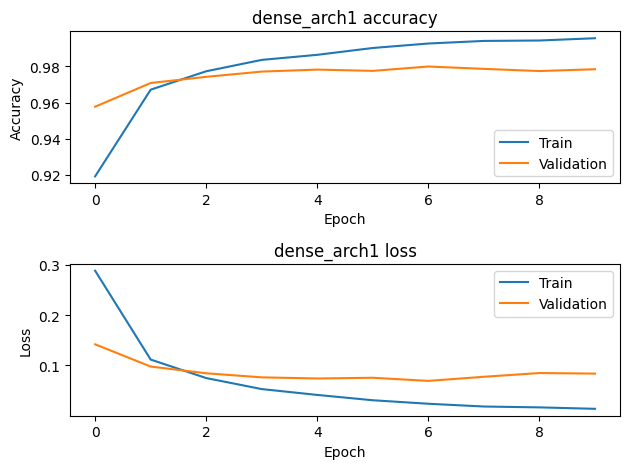

In [ ]:
hidden_layers = (100, 100)

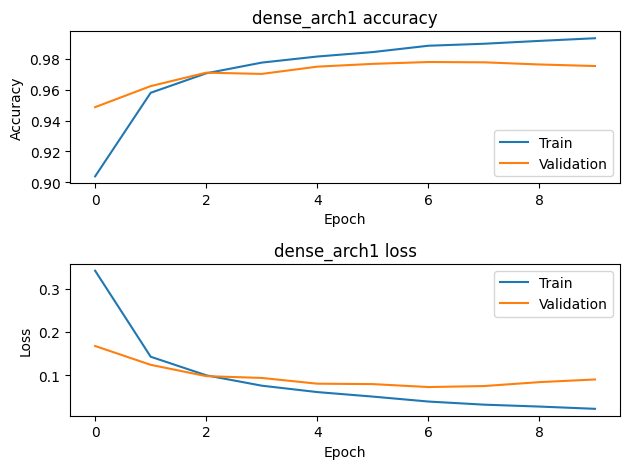

In [ ]:
hidden_layers = (10, 100)

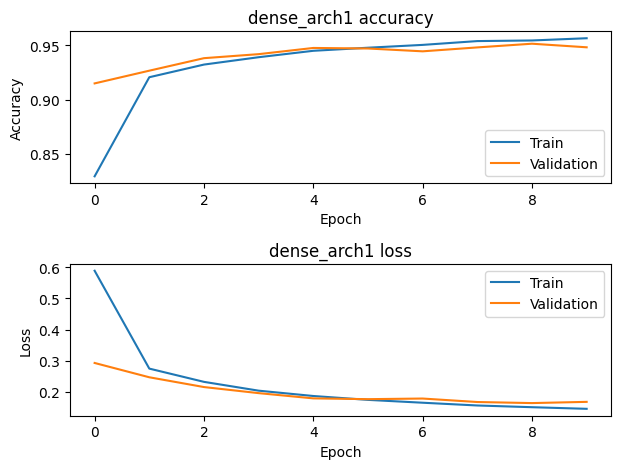

In [ ]:
hidden_layers = (200, 200)

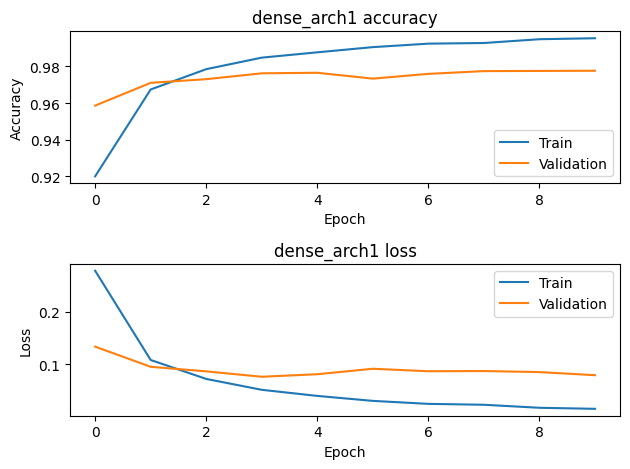
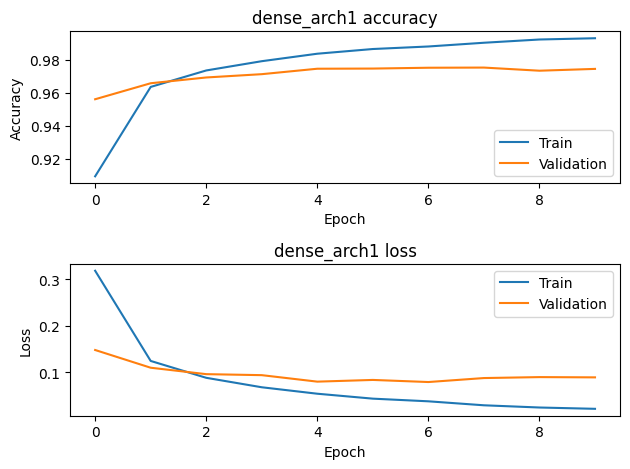

In [ ]:
hidden_layers = (100, 200)

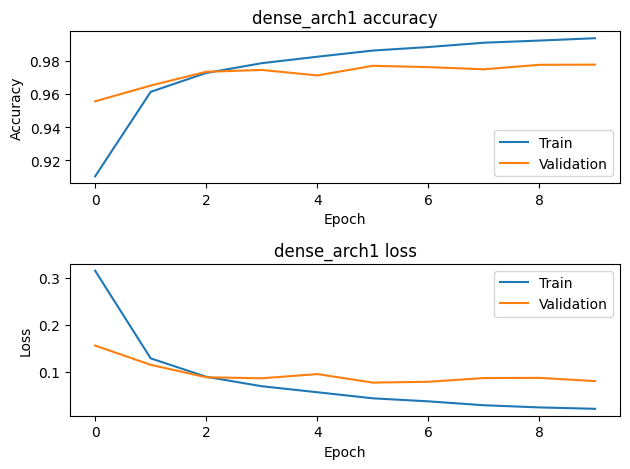

In [ ]:
hidden_layers = (10, 200)

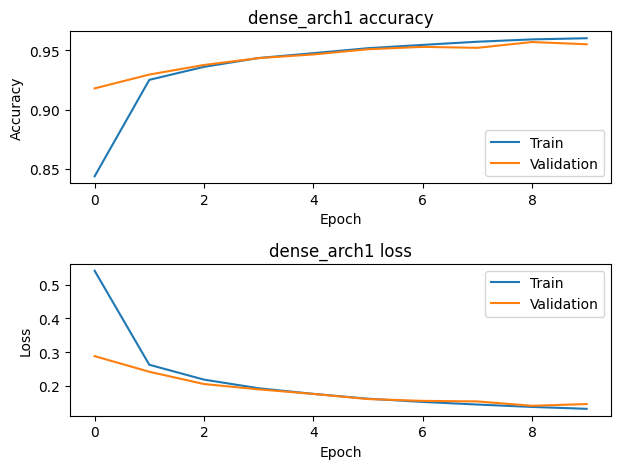

In [ ]:
hidden_layers = (200, 10)

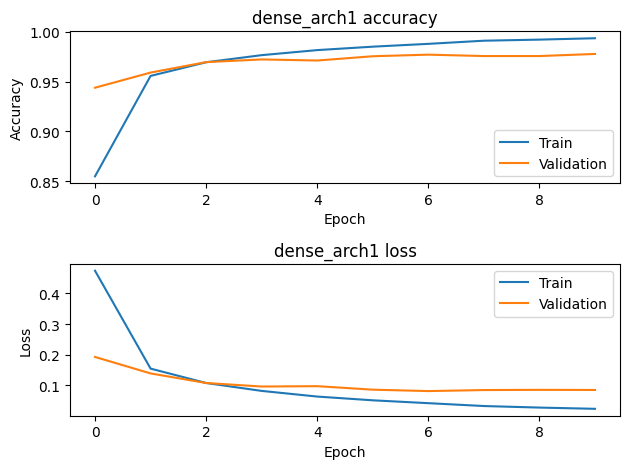

In [ ]:
hidden_layers = (100, 10)

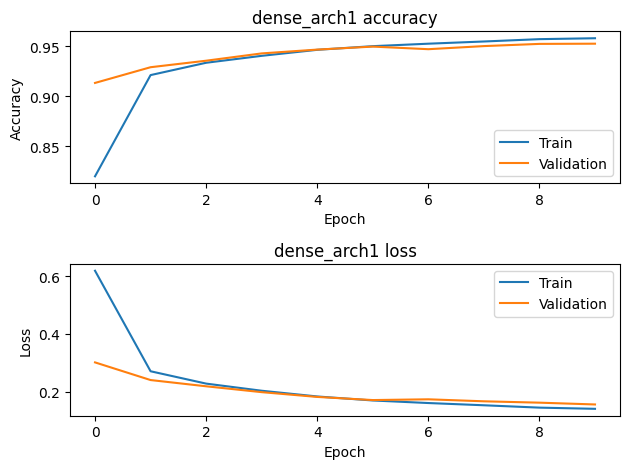

In [ ]:
hidden_layers = (10, 10)

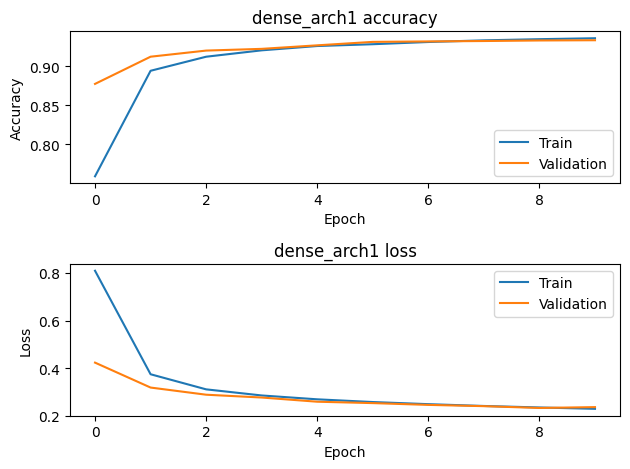

In [ ]:
hidden_layers = (30, 100)

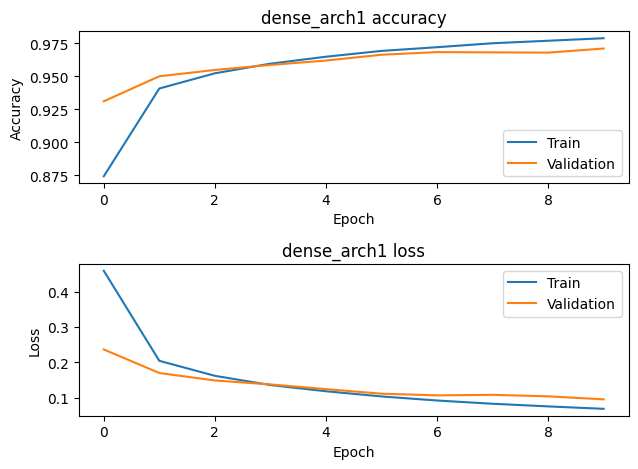

The general trends that are observed is that the training and validation accuracy goes down as the sum total of the hidden units goes down, which makes intuitive sense. Much more interestingly, the number of units in the first hidden layer has a much greater impact on the final training and validation accuracy than the number of units in the second hidden layers. This makes sense as the first hidden layers contributes much more to the number of model parameters than the second hidden layer. Within each experiment as well, regardless of the number of hidden units, the training accuracy and validation loss curve were greater than their counterparts, and though the starting point of each curve wildly varied based on the number of hidden units, after only 1 epoch, both curves converge and continue to do so as the number of epochs increases. 

The last experiement shows that we need at minimum ~27000-28000 model parameters to achieve over a 97% validation accuracy.

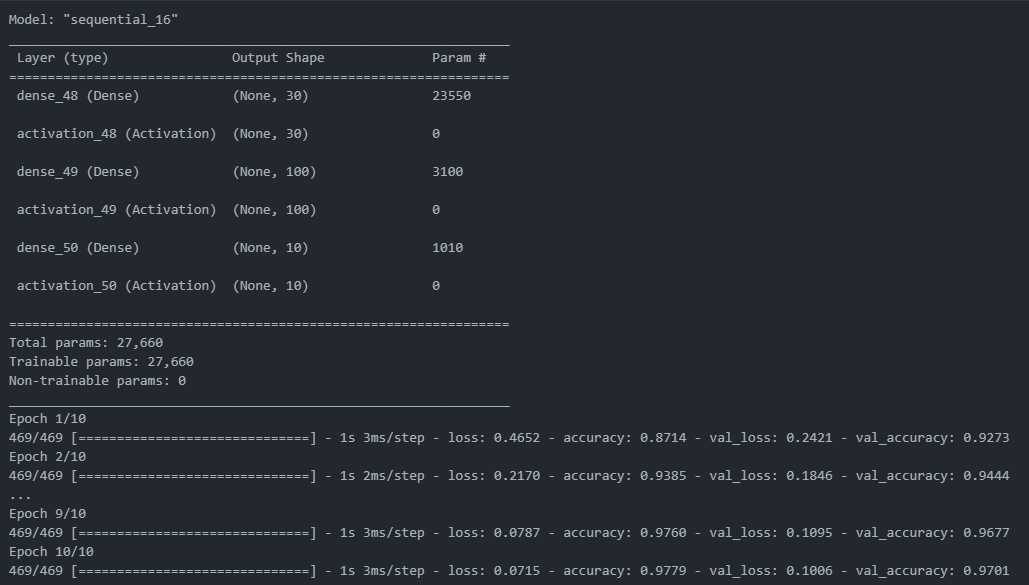

====================================================================================

1.4

In [ ]:
lambda = 1e-4

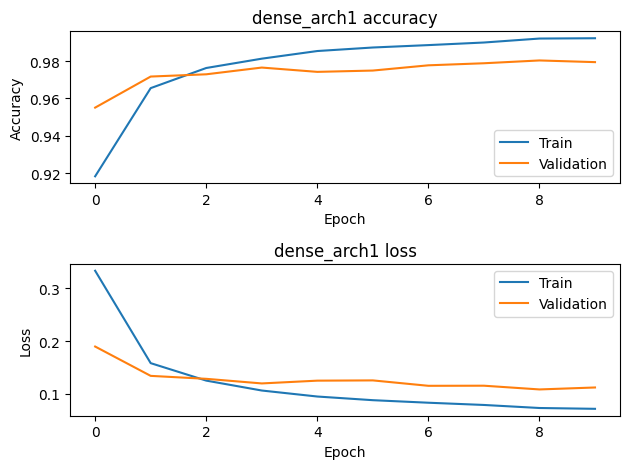

In [ ]:
lambda = 1

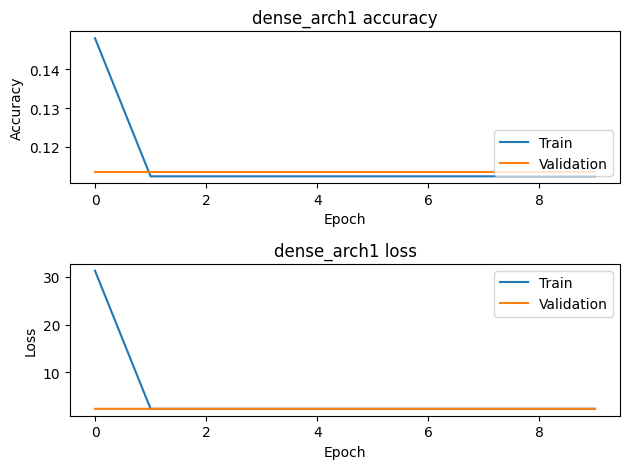

In [ ]:
lambda = 1e-2

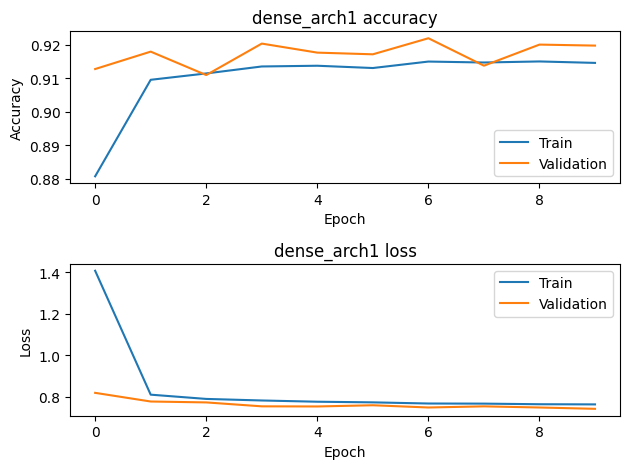

In [ ]:
lambda = 1e-6

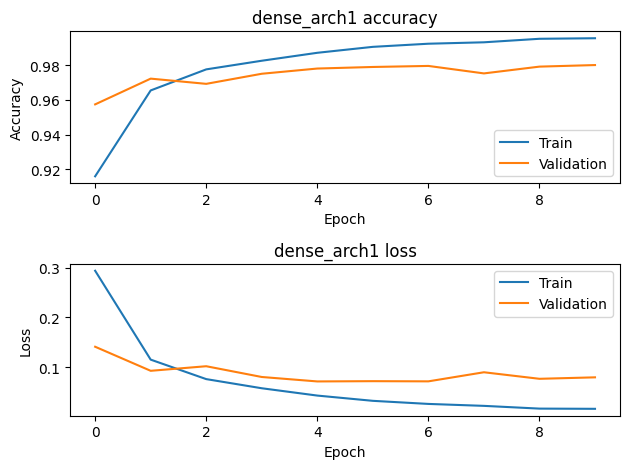

In [ ]:
lambda = 1e-8

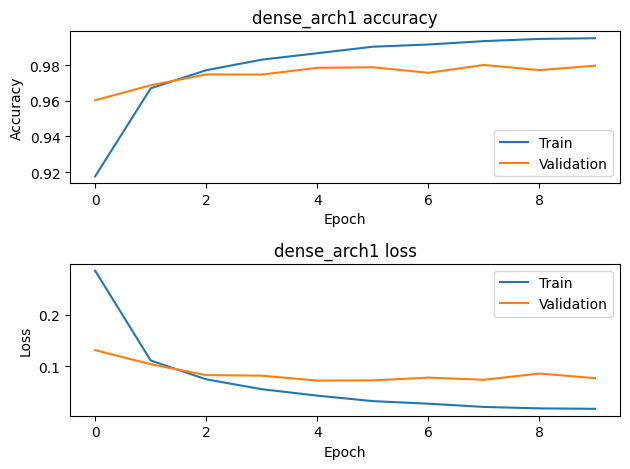

A lambda value of 1e-2 creates a learning curve that's similar to a smaller neural network (10 units in each hidden layer). This makes sense as a lambda value that's very small will lead to an overfit of the data leading to poor performance on the validation set and generalization to out of sample. 

====================================================================================

1.5

In [ ]:
hidden_layers = (200, 100)
lambda = 0

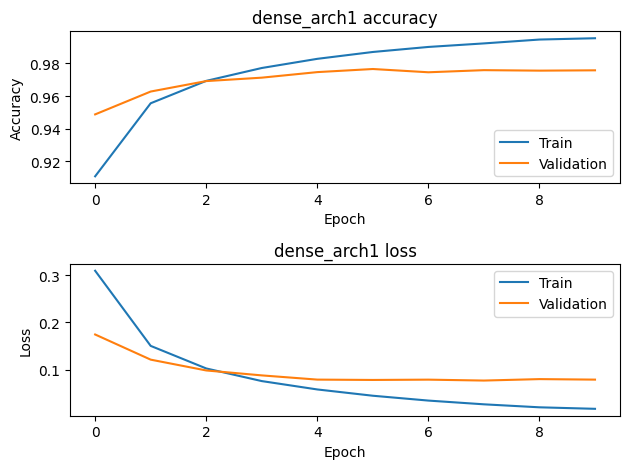

In [ ]:
hidden_layers = (200, 100)
lambda = 1e-8

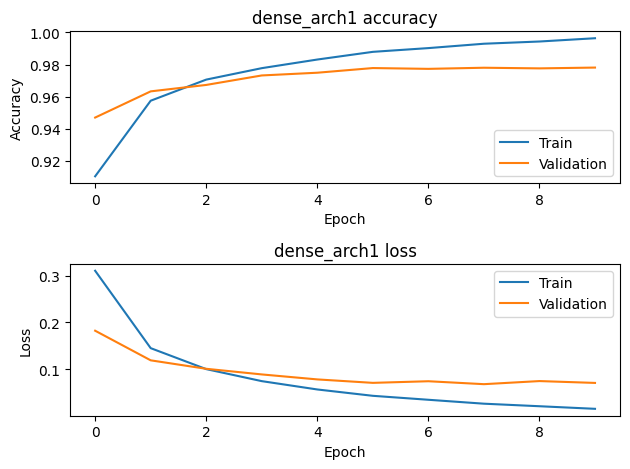

In [ ]:
hidden_layers = (100, 100)
lambda = 0

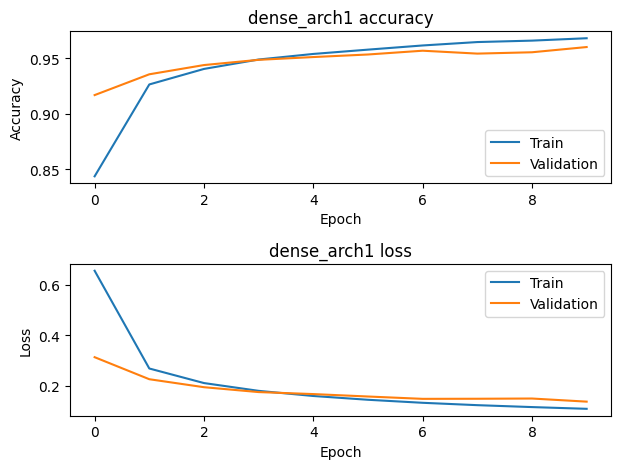

In [ ]:
hidden_layers = (100, 100)
lambda = 1e-8

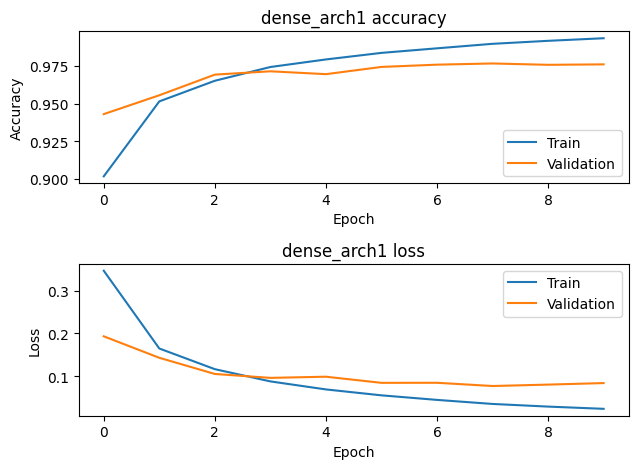
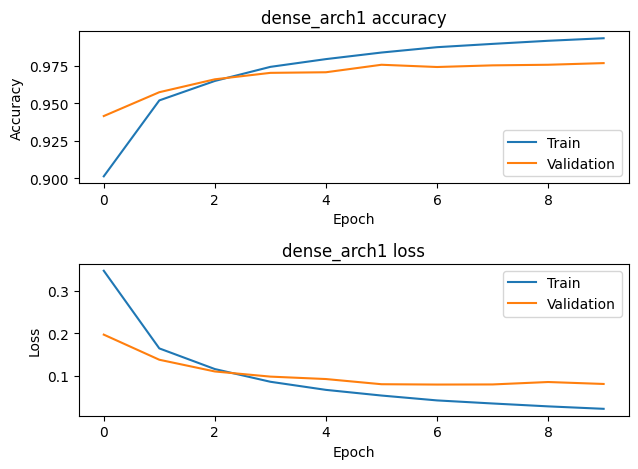
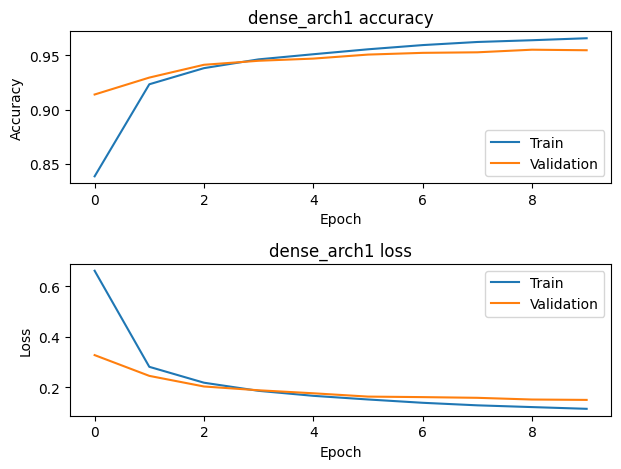

From the above experiments, we see that even if we vary the number of parameters and the regularization, it does take more epochs for convergence to occur. It used to occur around the first epoch, but tanh activation converges around the 3rd epoch. This does make sense because as s goes to infinity, tanh approaches 1, but ReLU approaches infinity. When the signal is very large, the output of tanh is limited so it will take a few more epochs for the model to learn around this constraint. With ReLU however, a positive signal can be as large as it needs to which allows more freedom for each unit in the hidden layers leading to a faster convergence. The linearity of ReLU and the constant derivative of it also accelerates the convergence of the gradient descent. 

====================================================================================

1.6 - Different Architectures

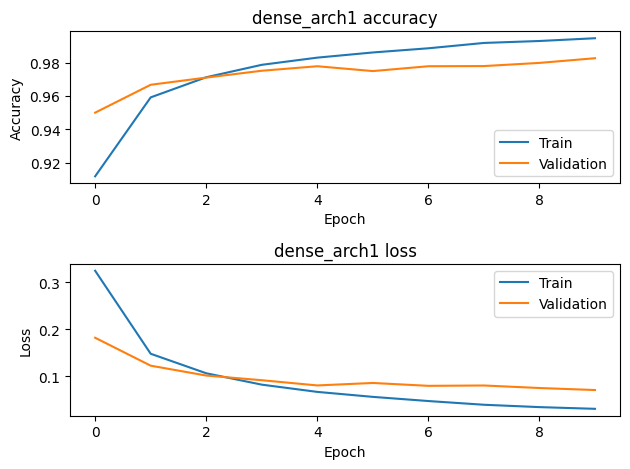

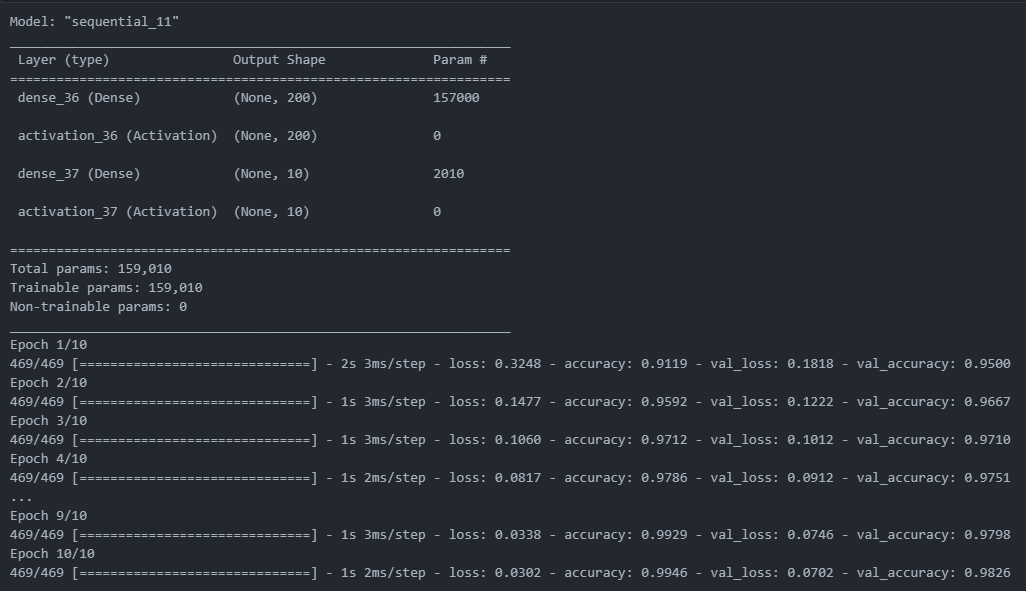

I was able to get a validation accuracy of 0.9826 with one hidden layer with 200 units, l1 regularization, ReLU activation, adam optimizer, and a regularization strenght of 1e-6.

====================================================================================

1.7 - Convolutional Neural Networks

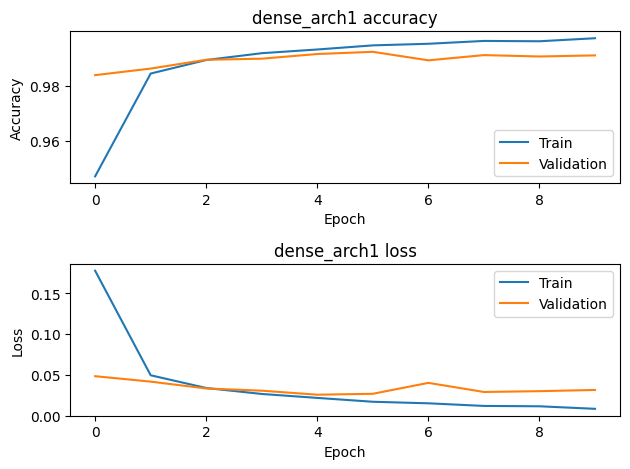

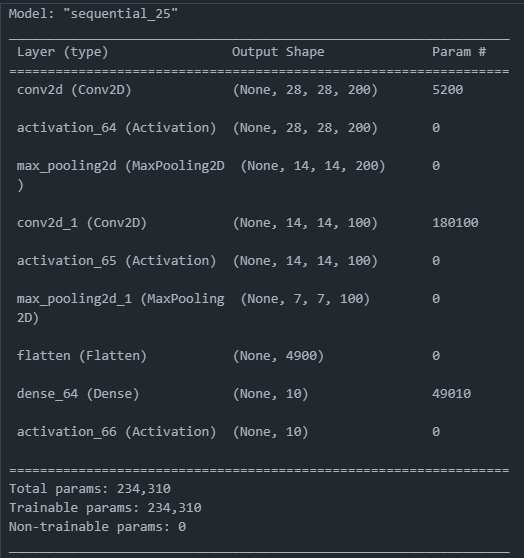
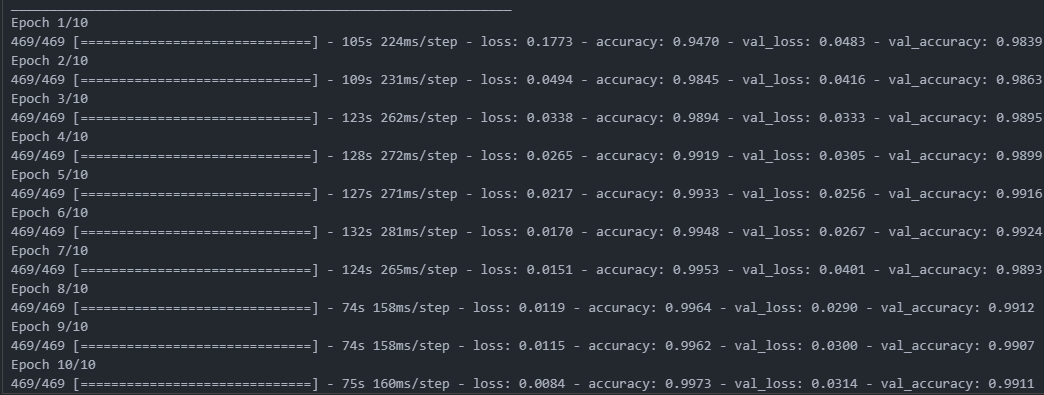

The number of parameters increased greatly from ~178,000 model parameteres in the dense net to ~234,000 parameters in the convolutional net. The learning curves partially reflect this change as well as the validation accuracy is much higher than that of a dense network ane the training accuracy is almost 1. We also see from the evaluation script that the images it misclassified are numbers that qualitatively we as humans wouldn't be able to place very well either e.g. first image in the second row. The in-sample error is less than 1% and the validation error is only 3%. This means the model will generalize very well to out of sample points.

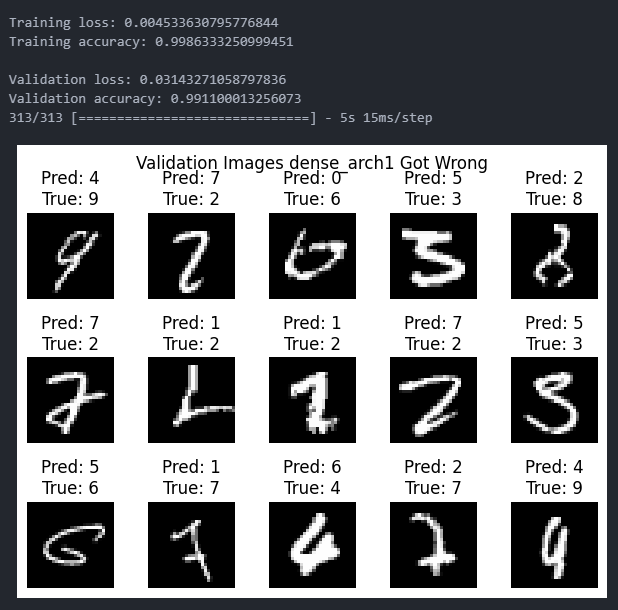

====================================================================================

2.2 - How does a GAN work?

Math is on separate PDF

====================================================================================

2.4 - Reflecting on GAN behavior

In [28]:
import matplotlib.pyplot as plt

In [29]:
discriminator_error = []
generator_error = []

In [30]:
with open("output.txt", "r", encoding='utf-8') as f:
    for line in f:
        if line.startswith("Discriminator"):
            error = float(line.split()[2])
            discriminator_error.append(error)
        
        elif line.startswith("Generator"):
            error = float(line.split()[2])
            generator_error.append(error)

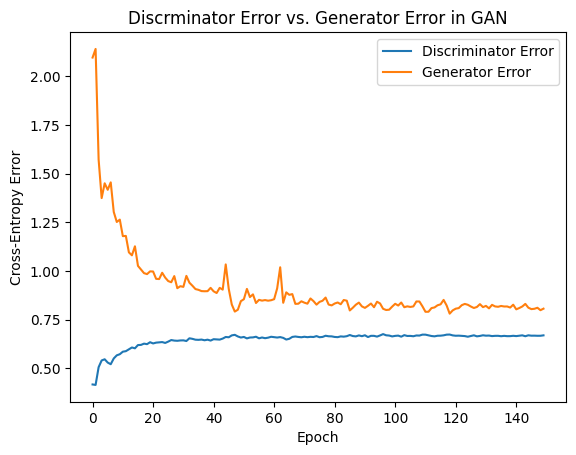

In [36]:
fig, ax = plt.subplots()

ax.plot(discriminator_error, label='Discriminator Error')
ax.plot(generator_error, label='Generator Error')
ax.set_title("Discrminator Error vs. Generator Error in GAN")
ax.set_xlabel("Epoch")
ax.set_ylabel("Cross-Entropy Error")
ax.legend()

By looking through the images, we see pieces of numbers slowly start to form as the number of epochs increases. The generator model is learning how to generate these numbers by learning how to generate different parts of them and then putting them together. It figures this out by gathering 'feedback' from the discriminator and backpropagating the error to improve performance. From the plot above, we see the generator loss starts quite large as the generator can't generate very many images to fool the discriminator which leads to a low discriminator loss as well. As the epochs progress though, we see the generator model improve dramatically at first and then make incrementally smaller changes. Consequently, we see the discriminator error rise as well. Both curves seem that they will converge at an error of 0.75 if trained for more epochs. This would mean the generator is able to generate images that the discriminator is no longer able to distinguish from the real data. 

Mode collapse occurs when a GAN produced a limited diversity of samples and doesn't capture the full variation of the training data. This is problematic because mode collapose greatly decreases the quality of the generated data. In the context of our GAN being trained with MNIST, it may only generate realistic images for a few digits like 2, 4, and/or 7 and struggle with generating realistic images for the other digits. Through skimming the code, note that there is no regularization applied on the kernel in the dense layers as with the previous part. Regularization helps prevent mode collapse by preventing overfitting and the GAN from memorizing specific patterns. Since there is no regularization applies, the generator's implementation did not avoid mode collapse. 

====================================================================================

3 - Feedback

I throughly enjoyed every aspect of this project. Beinga able to explore the current tools being used in machine learning and being able to apply the theory we've been learning in class has been a very fulfilling experience. The only minor change I would propose to this project is to provide a more reliable and less "hacky" default way to train the GAN. Google Colab is a fine service, but it can be quite finnicky with the free tier, so investigating more reliable alternatives would be worthwhile. No parts of the assignment were repetive, and I ended up using the IPython notebook format to utilize the ability to run different cells of code. It allowed me to run more experiments and explore different architectures, so I throughly appreciated the IPython notebook files being provided.